<a href="https://colab.research.google.com/github/dynasty-29/MyKaggleX_ShowcaseProjects/blob/main/crops_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. 

### **AIM**
To  build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.


### **Data fields**
* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* Temperature - temperature in degree Celsius
* Humidity - relative humidity in %
* ph - ph value of the soil
* Rainfall - rainfall in mm
* label - type of crop to farm

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load data
crop = pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
#preview
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#shape
crop.shape

(2200, 8)

In [ ]:
#checking info
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
#checking for nulls
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
#checking for duplicates
crop.duplicated().sum()

0

In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
contin = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall", "label"]

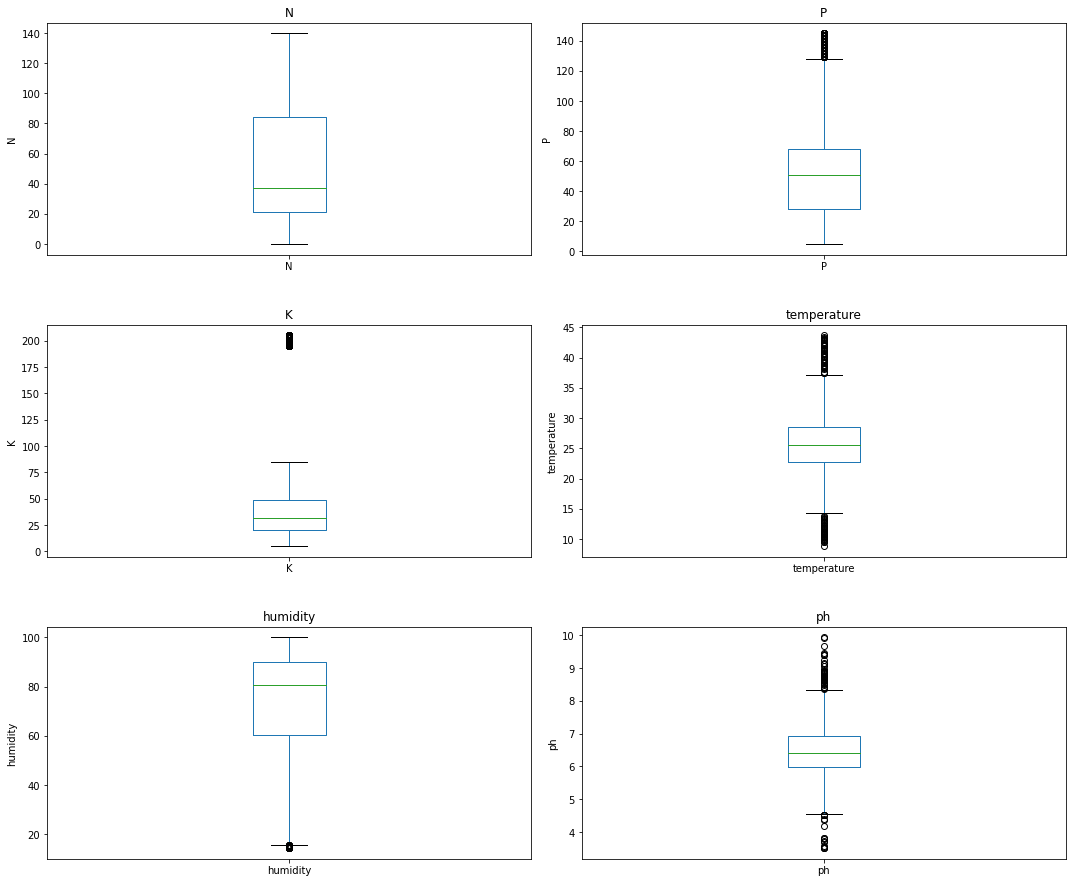

In [ ]:
#checking for outliers
fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  crop.boxplot(contin[i], grid=False, ax=ax)
  ax.set_title(f"{contin[i]}")
  ax.set_ylabel(contin[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()
     

In [ ]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

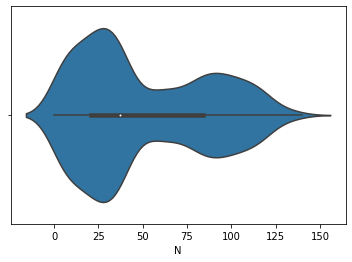

In [ ]:
#
sns.violinplot(data=crop, x="N")
plt.show()

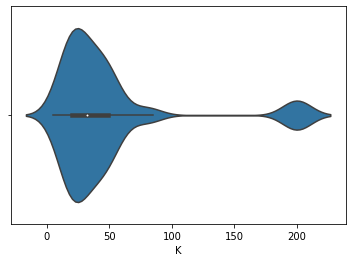

In [ ]:
sns.violinplot(data=crop, x="K")
plt.show()

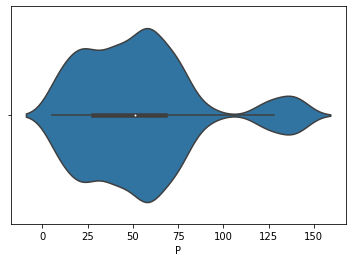

In [ ]:
sns.violinplot(data=crop, x="P")
plt.show()

In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

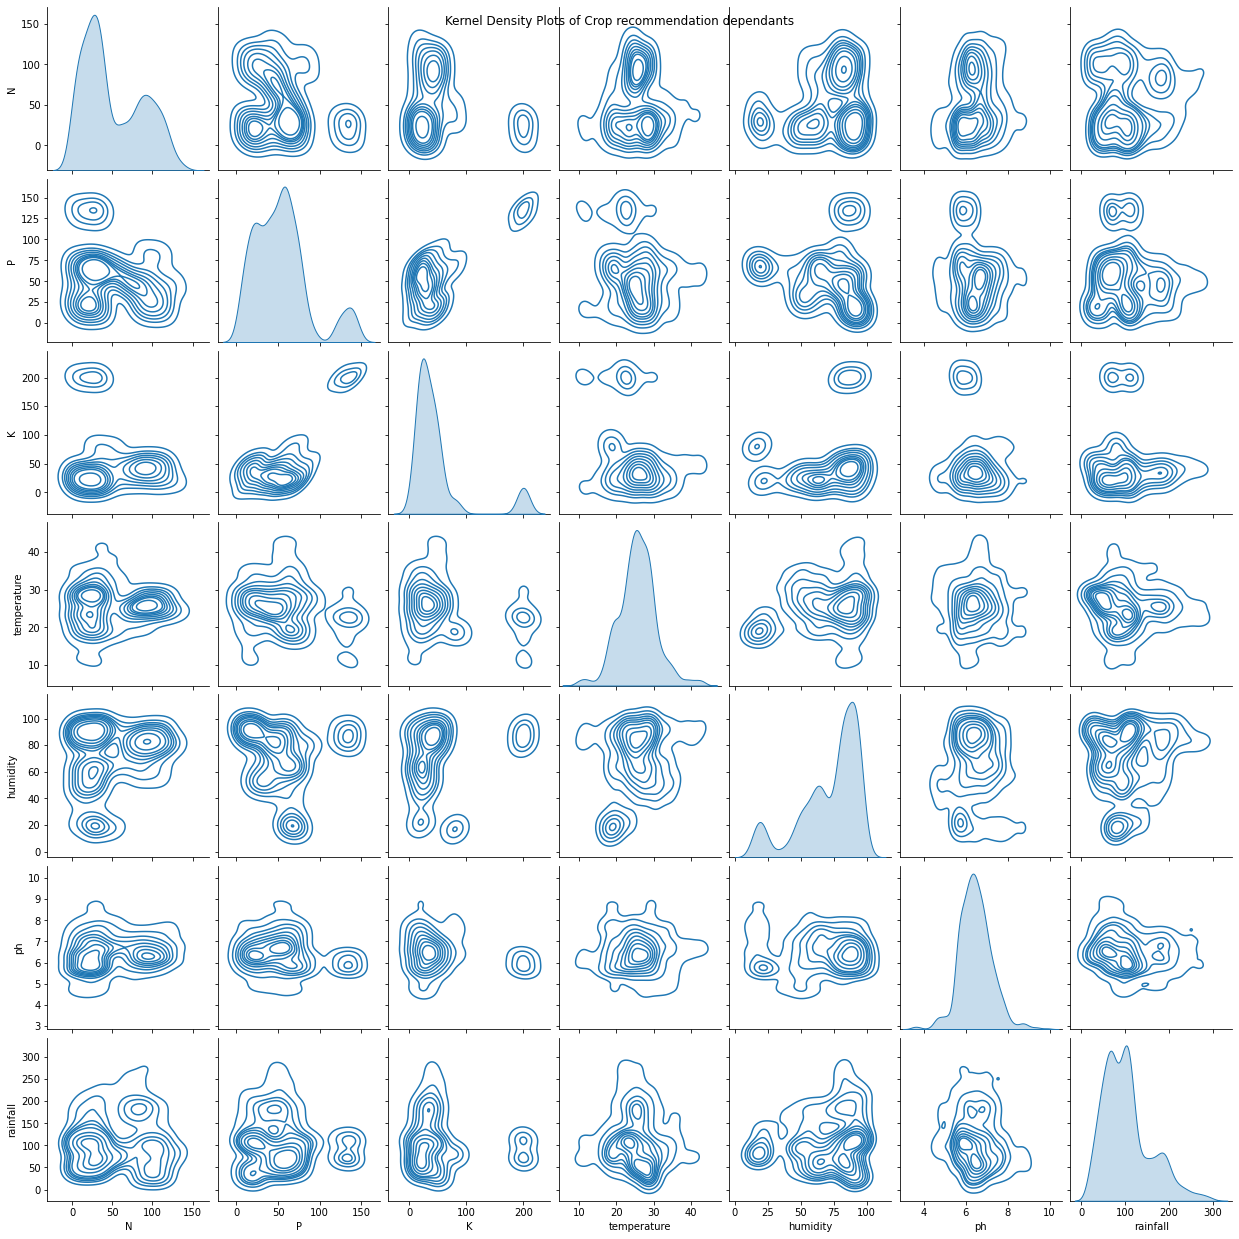

In [ ]:
sns.pairplot(data=crop, vars=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], kind="kde")
plt.suptitle("Kernel Density Plots of Crop recommendation dependants")
plt.show()

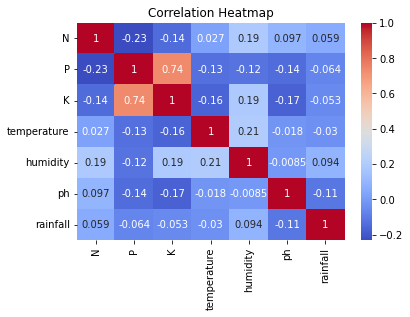

In [ ]:
# Compute the correlation matrix
corr = crop.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# **Modelling**

In [ ]:
#preview of our data
crop.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


In [ ]:
#Separating our target variable from predictor variables
X = crop.drop(["label"], axis = 1)
y = crop["label"]

In [ ]:
#we need to encode the target variable
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

# Fit and transform the target variable
y_encoded = le.fit_transform(y)

In [ ]:
# Splitting dataset to train and test sets 80% train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = .2, random_state=0)

In [ ]:
#scaled features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Fitting our model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 96.81818181818181 %


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       0.86      0.82      0.84        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       0.89      1.00      0.94        16
           7       1.00      1.00      1.00        18
           8       0.84      1.00      0.91        21
           9       1.00      1.00      1.00        20
          10       0.94      0.94      0.94        17
          11       0.94      0.89      0.91        18
          12       1.00      1.00      1.00        21
          13       0.88      0.92      0.90        25
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        23
          17       1.00    

# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
xgb = XGBClassifier()

model = xgb.fit(X_train, y_train)


In [ ]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.55%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        18
           8       0.95      1.00      0.98        21
           9       1.00      1.00      1.00        20
          10       1.00      0.94      0.97        17
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       0.96      1.00      0.98        25
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        23
          17       1.00    

In [ ]:
# save the model to disk
import pickle
filename = 'myxgbmodel'
pickle.dump(model, open(filename, 'wb'))